In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})
from envs.farmEnv import GraphWindFarm

In [2]:
def plot_curve(r_psrl, r_psgrl, ax, legend=False):
    mean_psrl = np.mean(r_psrl, axis=1)
    std_psrl = np.std(r_psrl, axis=1)

    mean_psgrl = np.mean(r_psgrl, axis=1)
    std_psgrl = np.std(r_psgrl, axis=1)

    smooth_psrl = np.convolve(mean_psrl, kernel, mode='valid')
    smooth_std_psrl = np.convolve(std_psrl, kernel, mode='valid')

    smooth_psgrl = np.convolve(mean_psgrl, kernel, mode='valid')
    smooth_std_psgrl = np.convolve(std_psgrl, kernel, mode='valid')
    x = np.arange(len(smooth_psrl))

    psrl_l, = ax.plot(smooth_psrl, color='red', alpha=0.8, label='psrl')
    ax.fill_between(x, smooth_psrl-smooth_std_psrl, smooth_psrl+smooth_std_psrl, color='red', alpha=0.3)
    psgrl_l, = ax.plot(smooth_psgrl, color='blue', alpha=0.8, label='psgrl')
    ax.fill_between(x, smooth_psgrl-smooth_std_psgrl, smooth_psgrl+smooth_std_psgrl, color='blue', alpha=0.3)
    #if legend:
    #    ax.legend(loc='upper left', ncol=2)
    ax.set_ylabel('episode return')
    ax.set_xlabel('number of episodes')

    return psrl_l, psgrl_l

def plot_layout(name, ax):
    conFile = f"./configs/{name}.yaml"
    env = GraphWindFarm(conFile)
    env.plot_graph_layout(ax)


In [3]:
#name = 'grid_12_wt'
r_psgrl_6 = np.load(f"./computations/windFarm_grid_6_wt_psgrl_reward.npy")
r_psrl_6 = np.load(f"./computations/windFarm_grid_6_wt_psrl_reward.npy")

r_psgrl_9 = np.load(f"./computations/windFarm_grid_9_wt_psgrl_reward.npy")
r_psrl_9 = np.load(f"./computations/windFarm_grid_9_wt_psrl_reward.npy")

/home/ard/git/gmdp/envs/farmEnv.py:81: RuntimeWarning: invalid value encountered in divide
  theta = np.rad2deg(np.arctan(rel_disp[:, :, 1]/rel_disp[:, :, 0]))


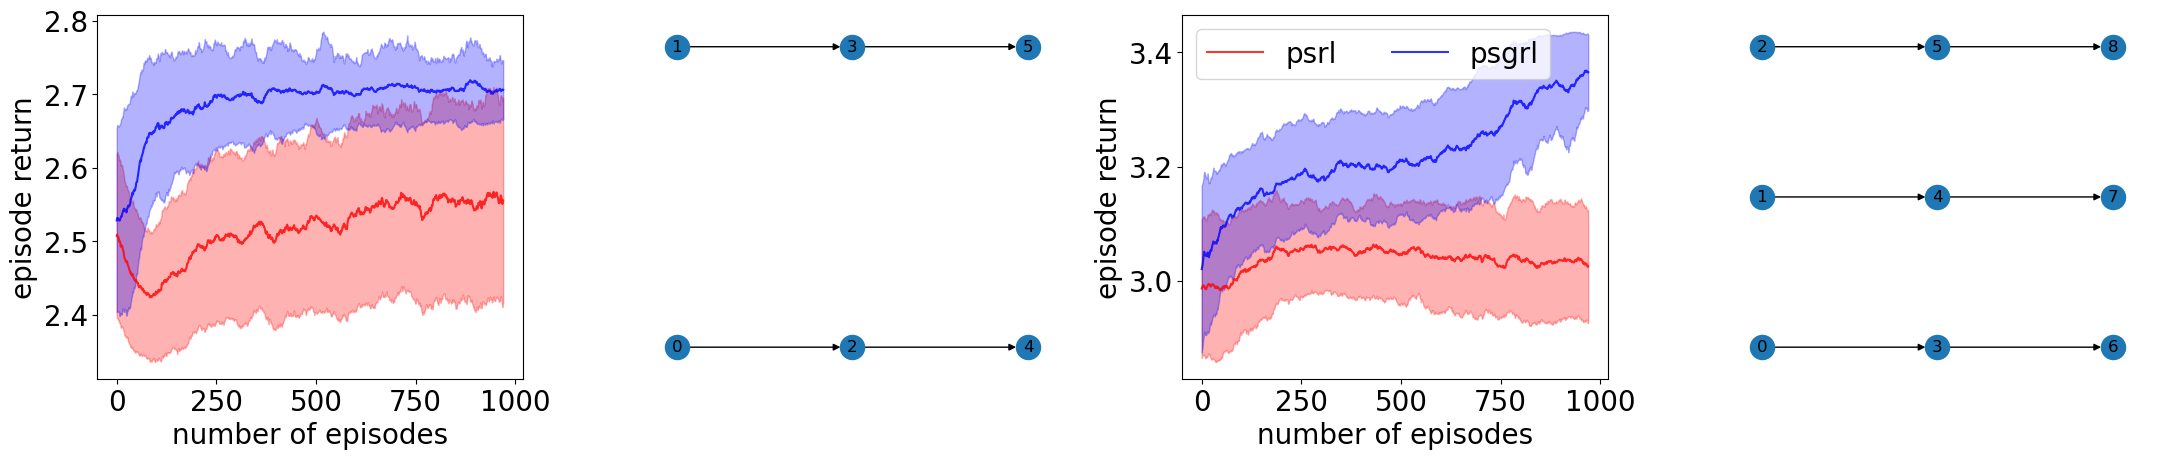

In [4]:
kernel_size = 30
kernel = np.ones(kernel_size) / kernel_size

fig, ax = plt.subplots(1,4,figsize=(22,5))
labels = ['PSRL', 'PSGRL']
plot_curve(r_psrl_6, r_psgrl_6, ax[0])
plot_layout('grid_6_wt', ax[1])
plot_layout('grid_9_wt', ax[3])
psrl_line, psgrl_line = plot_curve(r_psrl_9, r_psgrl_9, ax[2], legend=True)
#lgd = fig.legend(handles=[psrl_line, psgrl_line], labels=labels, loc='upper center', 
#             bbox_to_anchor=(0.5, -0.1),fancybox=False, shadow=False, ncol=2)
fig.subplots_adjust(bottom=0.1, wspace=0.4)
ax[2].legend(ncol=2, fontsize=20, loc='upper left')
plt.tight_layout()
plt.savefig(f"./figures/wind_farm.svg")

# visualize wind farms

yyyyyyyyyyyyyyyy


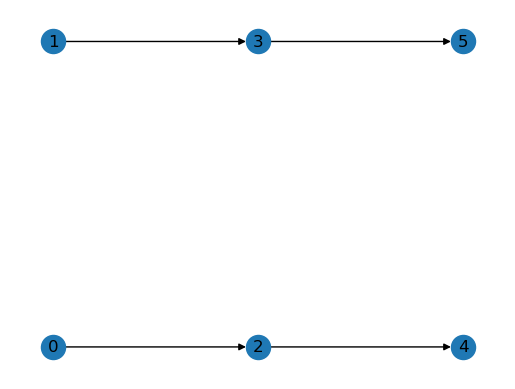

In [30]:
from envs.farmEnv import GraphWindFarm
name = "grid_6_wt"
config = f"./configs/{name}.yaml"
env = GraphWindFarm(config)
fig, ax = plt.subplots(1,1)
env.plot_graph_layout(ax)
plt.show()